**Attribute Information**\
Age: age of the patient [years]\
Sex: sex of the patient [M: Male, F: Female]\
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]\
RestingBP: resting blood pressure [mm Hg]\
Cholesterol: serum cholesterol [mm/dl]\
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]\
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]\
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]\
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]\
Oldpeak: oldpeak = ST [Numeric value measured in depression]\
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]\
HeartDisease: output class [1: heart disease, 0: Normal]

Explanations for each variable:\
**1. Age**\
Definition: The age of the patient in years.\
Type: Numerical (Continuous)\
**2. Sex**\
Definition: The biological sex of the patient.\
Categories:\
M: Male\
F: Female\
Type: Categorical\
**3. ChestPainType**\
Definition: The type of chest pain experienced by the patient.\
Categories:\
TA (Typical Angina): Chest pain related to decreased blood flow to the heart (a sign of coronary artery disease).\
ATA (Atypical Angina): Chest pain not directly related to heart disease.\
NAP (Non-Anginal Pain): Chest pain not related to angina or heart problems.\
ASY (Asymptomatic): No chest pain symptoms.\
Type: Categorical\
**4. RestingBP**\
Definition: The resting blood pressure of the patient, measured in mm Hg.\
Type: Numerical (Continuous)\
**5. Cholesterol**\
Definition: The level of serum cholesterol in the blood, measured in mg/dL.\
Type: Numerical (Continuous)\
**6. FastingBS**\
Definition: Indicates whether the patient’s fasting blood sugar is above 120 mg/dL.\
Categories:\
1: Fasting blood sugar > 120 mg/dL (high)\
0: Fasting blood sugar ≤ 120 mg/dL (normal)\
Type: Binary (0 or 1)\
**7. RestingECG**\
Definition: The results of the resting electrocardiogram (ECG).\
Categories:\
Normal: No abnormalities detected.\
ST: ST-T wave abnormalities (suggests issues with heart function).\
LVH: Left ventricular hypertrophy (indicates thickening of the heart muscle).\
Type: Categorical\
**8. MaxHR**\
Definition: The maximum heart rate achieved by the patient during exercise.\
Range: 60 - 202 bpm (beats per minute).\
Type: Numerical (Continuous)\
**9. ExerciseAngina**\
Definition: Whether the patient experiences angina (chest pain) due to exercise.\
Categories:\
Y: Yes, exercise-induced angina is present.\
N: No, exercise-induced angina is absent.\
Type: Binary (Y or N)\
**10. Oldpeak**\
Definition: The ST segment depression induced by exercise, compared to rest. It indicates possible ischemia (insufficient blood flow to the heart).\
Type: Numerical (Continuous)\
**11. ST_Slope**\
Definition: The slope of the ST segment during peak exercise.\
Categories:\
Up: Up-sloping (better prognosis).\
Flat: Flat (associated with a higher risk of heart disease).\
Down: Down-sloping (indicates severe heart disease).\
Type: Categorical\
**12. HeartDisease (Target Variable)**\
Definition: The presence or absence of heart disease.\
Categories:\
1: The patient has heart disease.\
0: The patient does not have heart disease (normal).\
Type: Binary (0 or 1)

In [27]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [28]:
df = pd.read_csv("dataset/3-heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
df.shape

(918, 12)

In [30]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [32]:
corr = df.corr(numeric_only=True)
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

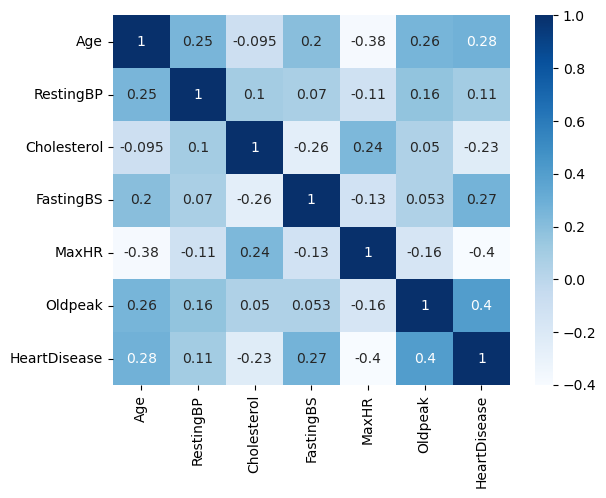

In [33]:
sns.heatmap(corr, cmap="Blues", annot=True)

Negative correlation indicates an inverse correlation. For example for MaxHR and HeartDisease, the correlation value is -0.4. This means that when one variable increases in value, the other decreases.

In [34]:
from sklearn.calibration import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

labelEncoderCols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

for col in labelEncoderCols:
    df = label_encoder(df, col)

y = df["HeartDisease"]
X = df.drop(["HeartDisease"], axis=1)

models = [('LR', LogisticRegression(max_iter=1000)),
          ("CART", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier())]

results = {}

for name, model in models:
    results[name] = {}
    for score in ["roc_auc", "f1", "precision", "recall", "accuracy"]:
        cvs = cross_val_score(model, X, y, scoring=score, cv=10).mean()
        results[name][score] = cvs

In [35]:
for model_name, scores in results.items():
    print(f"Model: {model_name}")
    for score_name, score_value in scores.items():
        print(f"  {score_name}: {score_value}")

Model: LR
  roc_auc: 0.9112492997198879
  f1: 0.8613771089855526
  precision: 0.8646110552748728
  recall: 0.8667619047619047
  accuracy: 0.8459459459459461
Model: CART
  roc_auc: 0.7904824929971989
  f1: 0.8042419975438442
  precision: 0.8296790927705221
  recall: 0.7934285714285714
  accuracy: 0.7872072072072072
Model: RF
  roc_auc: 0.9223011204481792
  f1: 0.8762823123909109
  precision: 0.8773278673096118
  recall: 0.8922857142857142
  accuracy: 0.8663663663663663


RF is the best model choice.

Accuracy: The ratio of the number of correct predictions and the total number of predictions.\
Precision: The number of true positives divided by the number of predicted positives.\
F1 Score: The harmonic mean of precision and recall.\
Recall: The number of true positives divided by the total number of actual positives.\
